In [57]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
##import tldextract
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
keras.__version__
import pandas as pd
from keras.datasets import mnist
import numpy as np
import random
import matplotlib.pyplot as plt
import glob
import os
import gc
import cv2
import PIL
import seaborn as sns
from keras import models
from keras import layers

In [23]:
doomdata = pd.read_html('https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/blob/main/doom_crossing_dataset.csv')[0]

In [24]:
animaldata = pd.read_html('https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/blob/main/animal_crossing_dataset.csv')[0]

In [25]:
animaldata = animaldata.drop(['Unnamed: 0'], axis=1)

In [26]:
animaldata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename
0,AnimalCrossing,g6ra3l,Elijah Wood visits a fan's island after seeing...,103447,0,0.96,7,1527,1.587664e+09,https://i.redd.it/yjrafuspulu41.png,yjrafuspulu41.png
1,AnimalCrossing,gp8bts,Amazing idea my girlfriend came up with,85186,0,0.93,16,1175,1.590253e+09,https://i.redd.it/2ehmq0fjpj051.jpg,2ehmq0fjpj051.jpg
2,AnimalCrossing,g8jju6,I just... really like Blathers,81436,0,0.95,28,903,1.587926e+09,https://i.redd.it/a2vvzng7g7v41.jpg,a2vvzng7g7v41.jpg
3,AnimalCrossing,gempba,I couldn't let my boy down. [OC],72708,0,0.96,24,522,1.588781e+09,https://i.redd.it/t88z1sn736x41.jpg,t88z1sn736x41.jpg
4,AnimalCrossing,fuv26r,My island is called Ravioli and I just finishe...,70357,0,0.96,9,563,1.586012e+09,https://i.redd.it/176wf6duetq41.jpg,176wf6duetq41.jpg


In [27]:
doomdata = doomdata.drop(['Unnamed: 0'], axis=1)

In [28]:
doomdata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename
0,Doom,gtli3b,And always remember,39007,0,0.94,1,531,1.590872e+09,https://i.redd.it/ksn72cinsy151.jpg,ksn72cinsy151.jpg
1,Doom,fnj4e5,Remember to have fun,30071,0,0.96,10,1158,1.584966e+09,https://i.redd.it/ik4d2mpi1fo41.jpg,ik4d2mpi1fo41.jpg
2,Doom,gemj1h,Can we please send our appreciacion to the lea...,27189,0,0.92,5,965,1.588780e+09,https://i.redd.it/y5pddy7h16x41.jpg,y5pddy7h16x41.jpg
3,Doom,fzhpqt,"This painting from this subreddit a year ago, ...",22948,0,0.97,1,296,1.586636e+09,https://i.redd.it/jrk0eogay8s41.jpg,jrk0eogay8s41.jpg
4,Doom,g4v23f,"Bethesda, you can still do the right thing her...",19896,0,0.96,34,956,1.587397e+09,https://i.redd.it/7c3lyx28tzt41.jpg,7c3lyx28tzt41.jpg


In [36]:
import pathlib

ac_image_folder = '/CNN-Doom-Crossing-Dataset-master/animal_crossing'
dm_image_folder = '/CNN-Doom-Crossing-Dataset-master/doom'
dataset_url = "https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/archive/master.zip"

if not os.path.exists(os.path.abspath('.') + ac_image_folder):
  image_zip = tf.keras.utils.get_file('CNN-Doom-Crossing-Dataset-master.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = dataset_url,
                                      extract = True)

  image_zip = os.path.abspath('CNN-Doom-Crossing-Dataset-master')

else:
  image_zip = os.path.abspath('CNN-Doom-Crossing-Dataset-master')


In [34]:
print(image_zip)
sub_dir = os.listdir(image_zip)
sub_dir

/content/CNN-Doom-Crossing-Dataset-master


['animal_crossing', 'doom']

In [18]:
#print(os.path.dirname(dm_PATH))
del(image_zip)
del(dm_image_folder)
del(ac_image_folder)

#ac_PATH = 
print(ac_PATH)
#/content/CNN-Doom-Crossing-Dataset-master/animal_crossing
print(dm_PATH)

/content/CNN-Doom-Crossing-Dataset-master/animal_crossing/*.jpg
/content/CNN-Doom-Crossing-Dataset-master/doom/*.jpg


In [29]:
import gc
gc.collect()

98

In [31]:
categories = ['animal_crossing', 'doom']

In [32]:
from PIL import Image

In [40]:
IMG_SIZE = 80
#new_array = cv2.resize(ac_images, (IMG_SIZE, IMG_SIZE))

In [41]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(image_zip, category)
        category_count = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, category_count])
            except Exception as e:
                pass

create_training_data()

In [42]:
print(len(training_data))

1597


In [45]:
random.shuffle(training_data)

In [46]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)


In [66]:
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = to_categorical(y)
#X_train, Y_train, X_test, Y_test = train_test_split(x, y, test_size=.3, random_state=42)
#print(Y_train.shape, X_train.shape)
#print(x.shape, y.shape)

(480, 80, 80, 1)

In [50]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(80,80,1)))
model.add(layers.Dense(3200, activation='relu'))
model.add(layers.Dense(1600, activation='relu'))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
NAME = "Animal-vs-Doom-Crossing"
checkpoint_path = "train_ckpt/cp.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
callbacks_list = ([checkpoint], [tensorboard])
model.fit(x, y, epochs=50, batch_size=110, shuffle=True, validation_split=0.20, callbacks=callbacks_list, verbose=1)

ValueError: ignored

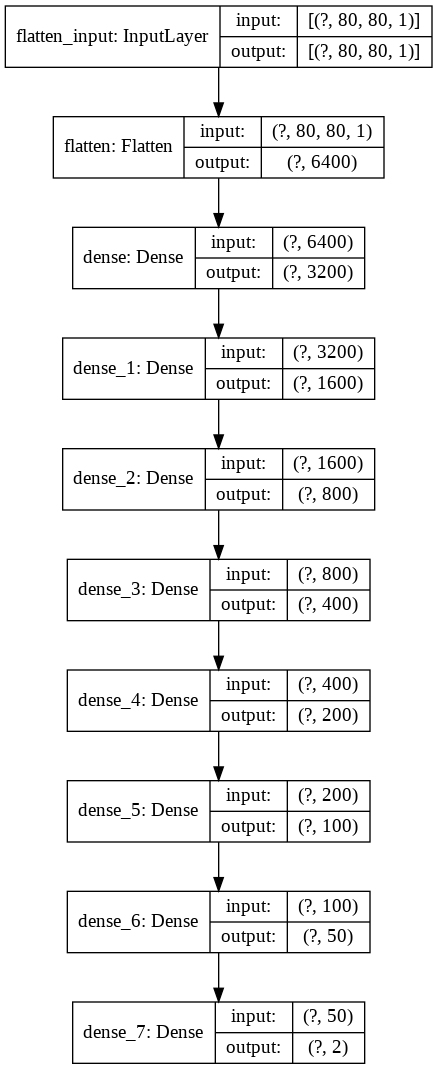

In [53]:
plot_model(model, show_shapes=True, show_layer_names=True)

<function matplotlib.pyplot.show>

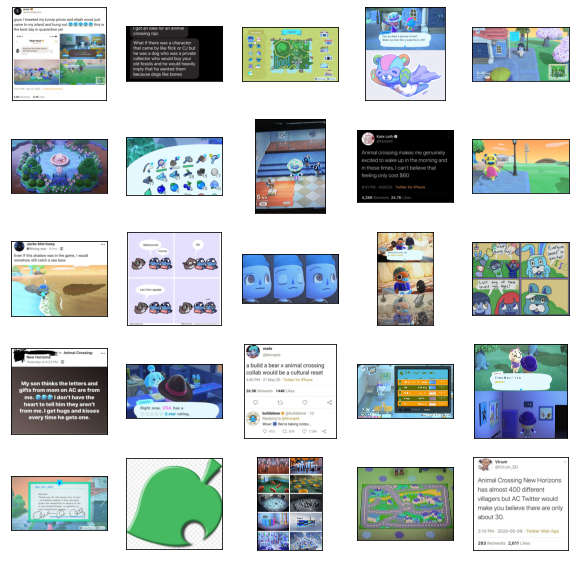

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(new[titles[i]], cmap=plt.cm.binary)
plt.show